In [1]:
import pandas as pd 
import io
import numpy as np 
from sklearn.svm import SVR,SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
lb=LabelEncoder()
sc=StandardScaler()
mm=MinMaxScaler()

In [2]:
my_df=pd.read_csv('diabetes_prediction_dataset.csv')

X=my_df.iloc[:,0:8].values

X 

Y=my_df.iloc[:,-1].values

Y 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [3]:
# labelencoding 

X[:,0]=lb.fit_transform(X[:,0])


In [4]:
# Normaliztion 

X[:,[1,5,6,7]]=sc.fit_transform(X[:,[1,5,6,7]])


In [5]:
onehotencoder=ColumnTransformer([("encoder",OneHotEncoder(),[4])],remainder="passthrough")


X=np.array(onehotencoder.fit_transform(X))
X


array([[0.0, 0.0, 0.0, ..., -0.3210557916611154, 1.0017057235688864,
        0.04770421587098508],
       [1.0, 0.0, 0.0, ..., -0.00011558367772035405, 1.0017057235688864,
        -1.426209989644696],
       [0.0, 0.0, 0.0, ..., -0.00011558367772035405, 0.16110802156803655,
        0.4898784775256894],
       ...,
       [0.0, 0.0, 0.0, ..., 0.07672925485351482, 0.16110802156803655,
        0.4161827672499054],
       [0.0, 0.0, 0.0, ..., 1.2203612635830785, -1.4266876377669033,
        -0.9349052544728024],
       [0.0, 1.0, 0.0, ..., -0.7369219766536841, 1.0017057235688864,
        -1.1805576220587493]], dtype=object)

In [6]:
# split dataset

x_train , x_test , y_train , y_test = train_test_split(X,Y,train_size=0.80 , random_state=42)

In [47]:
svcmodel=SVC(kernel='rbf', C=1, random_state=42)

In [48]:
svcmodel=svcmodel.fit(x_train,y_train)

In [49]:
print('SVRModel Train Score is : ' , svcmodel.score(x_train, y_train))
print('SVRModel Test Score is : ' , svcmodel.score(x_test, y_test))

SVRModel Train Score is :  0.966625
SVRModel Test Score is :  0.965


In [50]:
y_predict=svcmodel.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Confusion Matrix is : 
 [[18283     9]
 [  691  1017]]


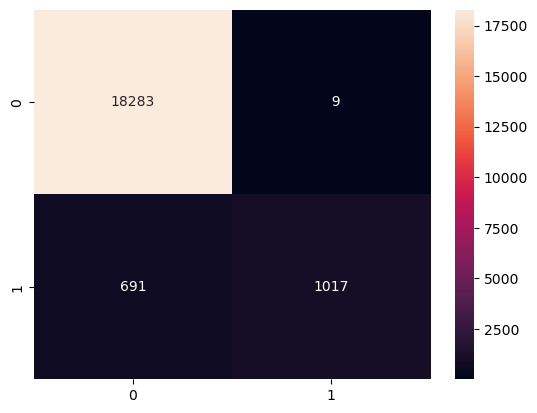

In [51]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, annot=True,fmt='3g')
# sns.heatmap(CM, center = True)
plt.show()

In [52]:
rfc = RandomForestClassifier(max_depth=5,n_estimators=100,max_features=10, random_state=42)

# fit model to training data
rfc.fit(x_train, y_train)
score = rfc.score(x_test, y_test)
print("Accuracy:", score)
y_pred=rfc.predict(x_test)
# evaluate model performance on testing data


Accuracy: 0.97215


Confusion Matrix is : 
 [[18292     0]
 [  557  1151]]


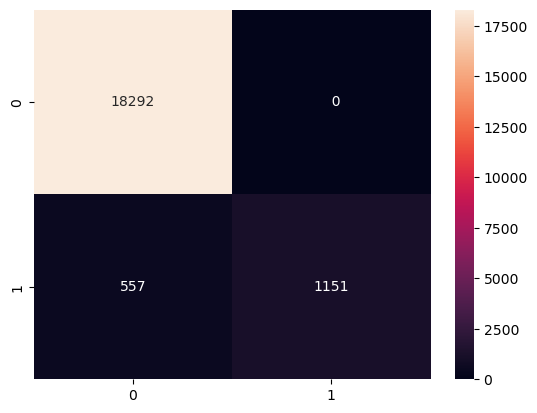

In [53]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, annot=True,fmt='3g')
# sns.heatmap(CM, center = True)
plt.show()

In [54]:
DTC = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 42)
DTC.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [55]:
predictions = DTC.predict(x_test)
# type(predictions)

In [56]:
accuracy_score(y_test, y_pred = predictions)

0.97215

In [57]:
mean_squared_error(y_test, y_pred = predictions)

0.02785

In [58]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

Confusion Matrix is : 
 [[18292     0]
 [  557  1151]]


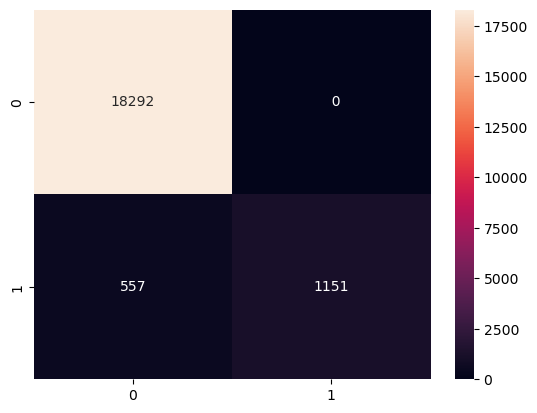

In [59]:
CM = confusion_matrix(y_test, predictions)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, annot=True,fmt='3g')
# sns.heatmap(CM, center = True)
plt.show()

In [60]:
clf = GaussianNB()

# Fit the classifier to the training data
clf.fit(x_train, y_train)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
# Make predictions on the test data
y_pred = clf.predict(x_test)

# Evaluate the accuracy of the model


Accuracy: 0.95345


Confusion Matrix is : 
 [[18292     0]
 [  557  1151]]


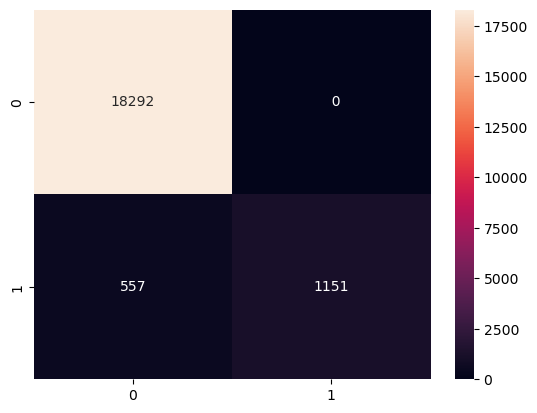

In [61]:
CM = confusion_matrix(y_test, predictions)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, annot=True,fmt='3g')
# sns.heatmap(CM, center = True)
plt.show()

In [63]:
classifier = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski', p = 2 )
classifier.fit(x_train, y_train)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy: 0.95855


E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix is : 
 [[18173   119]
 [  663  1045]]


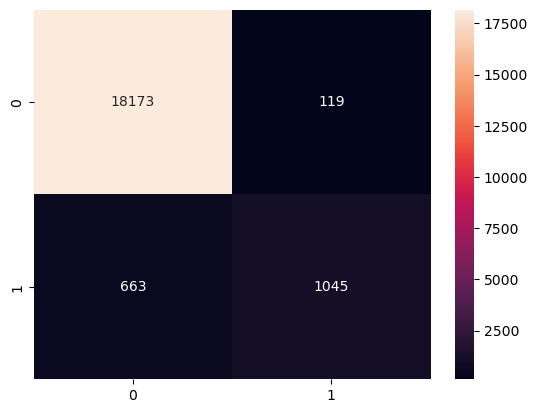

In [64]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, annot=True,fmt='3g')
# sns.heatmap(CM, center = True)
plt.show()

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}



#--------------------------------------------------------------------

# Logistic Regression 

from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=42)
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and score
print("Best hyperparameters: ", best_params)
print("Best score: ", best_score)

y_pred=grid_search.predict(x_test)



# classifier.fit(x_train, y_train)

# y_pred=classifier.predict(x_test)

acc=grid_search.score(x_test, y_test)

print(f"the accuracy of the model is : {acc}")

print("-"*120)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print(cm)
# drawing confusion matrix
sns.heatmap(cm, annot=True,fmt='3g')
# sns.heatmap(CM, center = True)
plt.show()